
## Домашнее задание 3. Простой анализ данных.

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline




### Задача 1.

На занятии мы уже начинали работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [409]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [540]:
train=data.sample(frac = 0.7)
test=data.drop(train.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [541]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [542]:
train_features, train_target = get_features_and_target(train)
test_features, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Посмотрим на распределение пассажиров по классам, в котором они находились, и их смертность.

Text(0.5, 1.05, 'Зависимость смертности от класса пассажира')

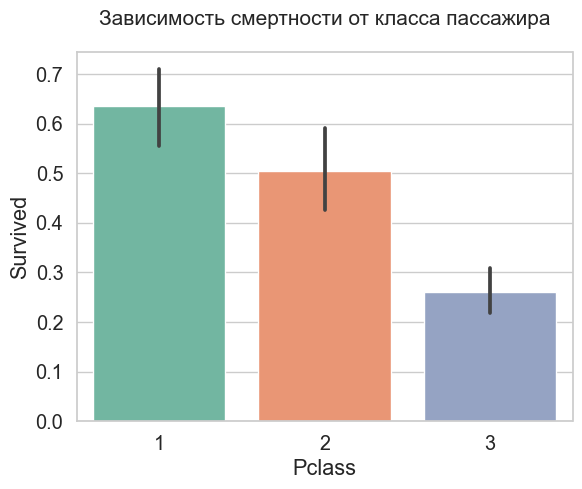

In [543]:
graph = sns.barplot(x='Pclass', y='Survived', data=train)
graph.set_title('Зависимость смертности от класса пассажира', y=1.05, fontsize=15)

Из графика видно, что наибольший шанс выжить был у пассажиров 1 класса.
Для более подробного анализа отдельно расссмотрим зависимость от класса и пола человека.

Text(0.5, 1.05, 'Зависимость смертности от класса и пола пассажира')

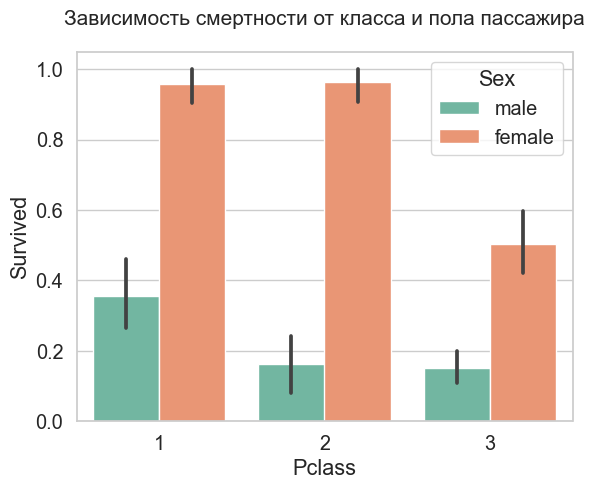

In [56]:
g=sns.barplot(x='Pclass', y='Survived', hue ='Sex', data=train)
g.set_title('Зависимость смертности от класса и пола пассажира', y=1.05, fontsize=15)

Можем заметить, что доля выжившихся женщин 1 и 2 классов примерна равна и значительно больше, чем у 3 класса.
При этом шанс выжить у мужчин 2 и 3 класса, меньше чем у мужчин из 1 класса.

Найдем распределение статуса(выжил или нет) и количества родственников на борту.
Сначала рассмотрим зависимость от количества братьев, сестер(в том числе сводных) и супругов.

Text(0.5, 1.05, 'Зависимость смертности от количества братьев, сестер(в том числе сводных) и супругов на борту')

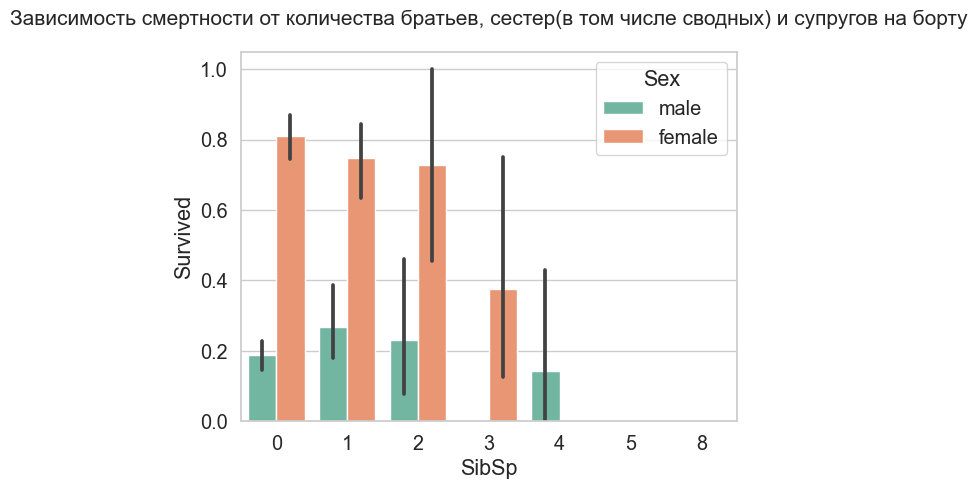

In [53]:
g=sns.barplot(x='SibSp', y='Survived', hue ='Sex', data=train)
g.set_title('Зависимость смертности от количества братьев, сестер(в том числе сводных) и супругов на борту',
            y=1.05, fontsize=15)

Заметим, что женщины, которые имели меньшее число родственников на борту имели больший шанс выжить.
Среди мужчин наименьшая доля сметности у тех, кто имел на борту 1 родственника.

Теперь посмотрим зависимость смертности от количества родителей и детей на борту у пассажиров.

Text(0.5, 1.05, 'Зависимость смертности от количества родителей и детей на борту')

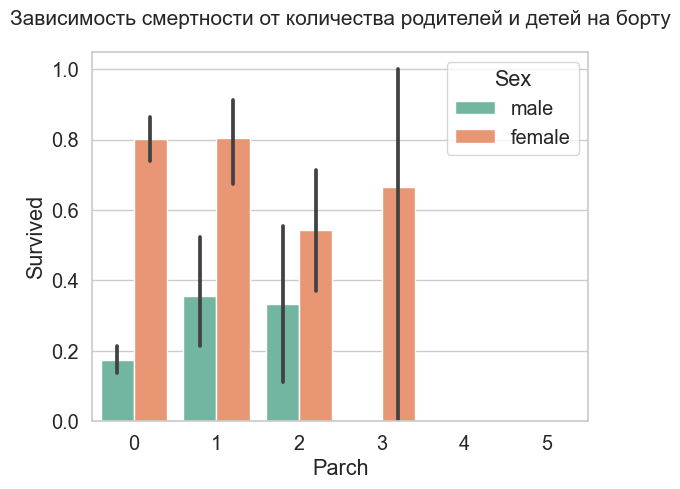

In [54]:
g = sns.barplot(x='Parch', y='Survived', hue ='Sex', data=train)
g.set_title('Зависимость смертности от количества родителей и детей на борту',
            y=1.05, fontsize=15)

Женщины, у которых был 1 родитель или ребенок на борту или их вовсе не было, имели наибольший шинс выжить.
Среди мужчин чаще выживали те, кто имел на борту одного или двух детей или родителей.

Рассмотрим зависимость смертности людей на Титанике от их возроста и пола

Text(0.5, 1.05, 'Зависимость смертности от пола и возраста')

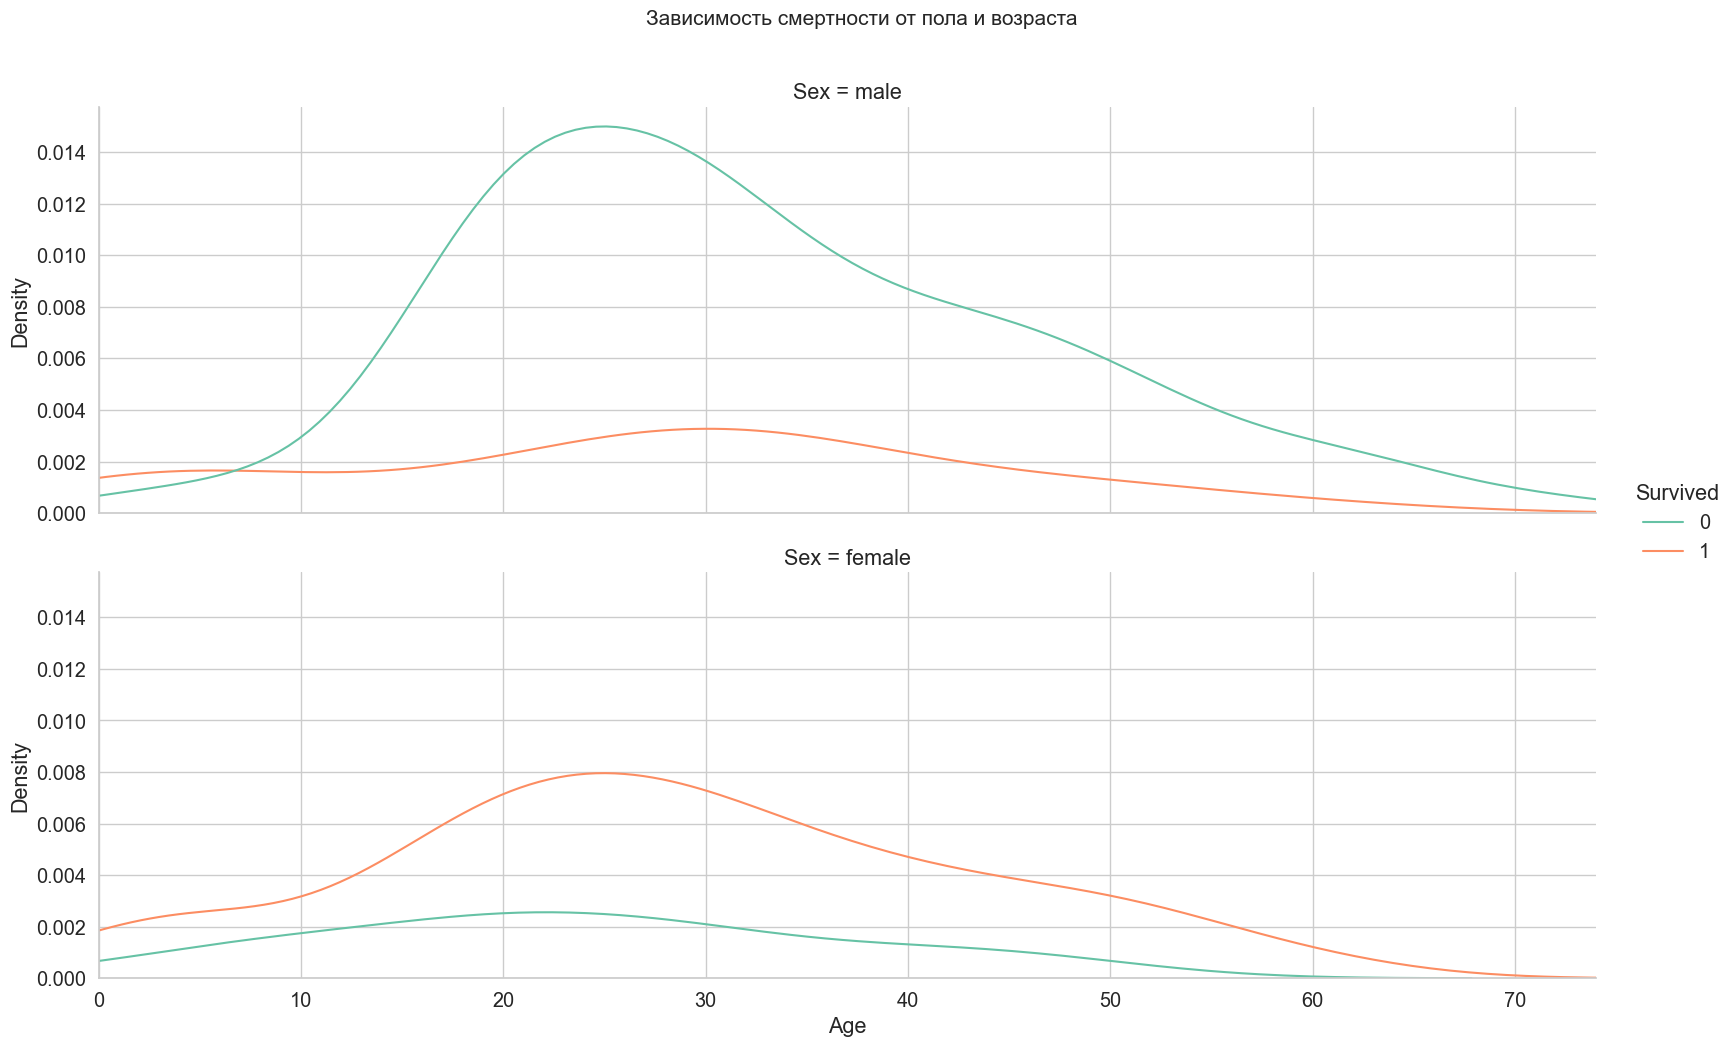

In [70]:
graph = sns.displot(x="Age", row="Sex", hue='Survived', kind="kde", data=train, aspect=3.3)
graph.set(xlim=(0, train['Age'].max()))
graph.fig.suptitle('Зависимость смертности от пола и возраста', y=1.05, fontsize=15)

Самая большая смертность у мужчины в возрасте примерно от 8 до 60 лет, женщины же имели больший шанс выжить.

Рассмотрим влияние возраста и класса пассажира на смертность отдельно для женщин и мужчин.

Text(0.5, 1.05, 'Зависимость смертности у мужчин от класса и возраста')

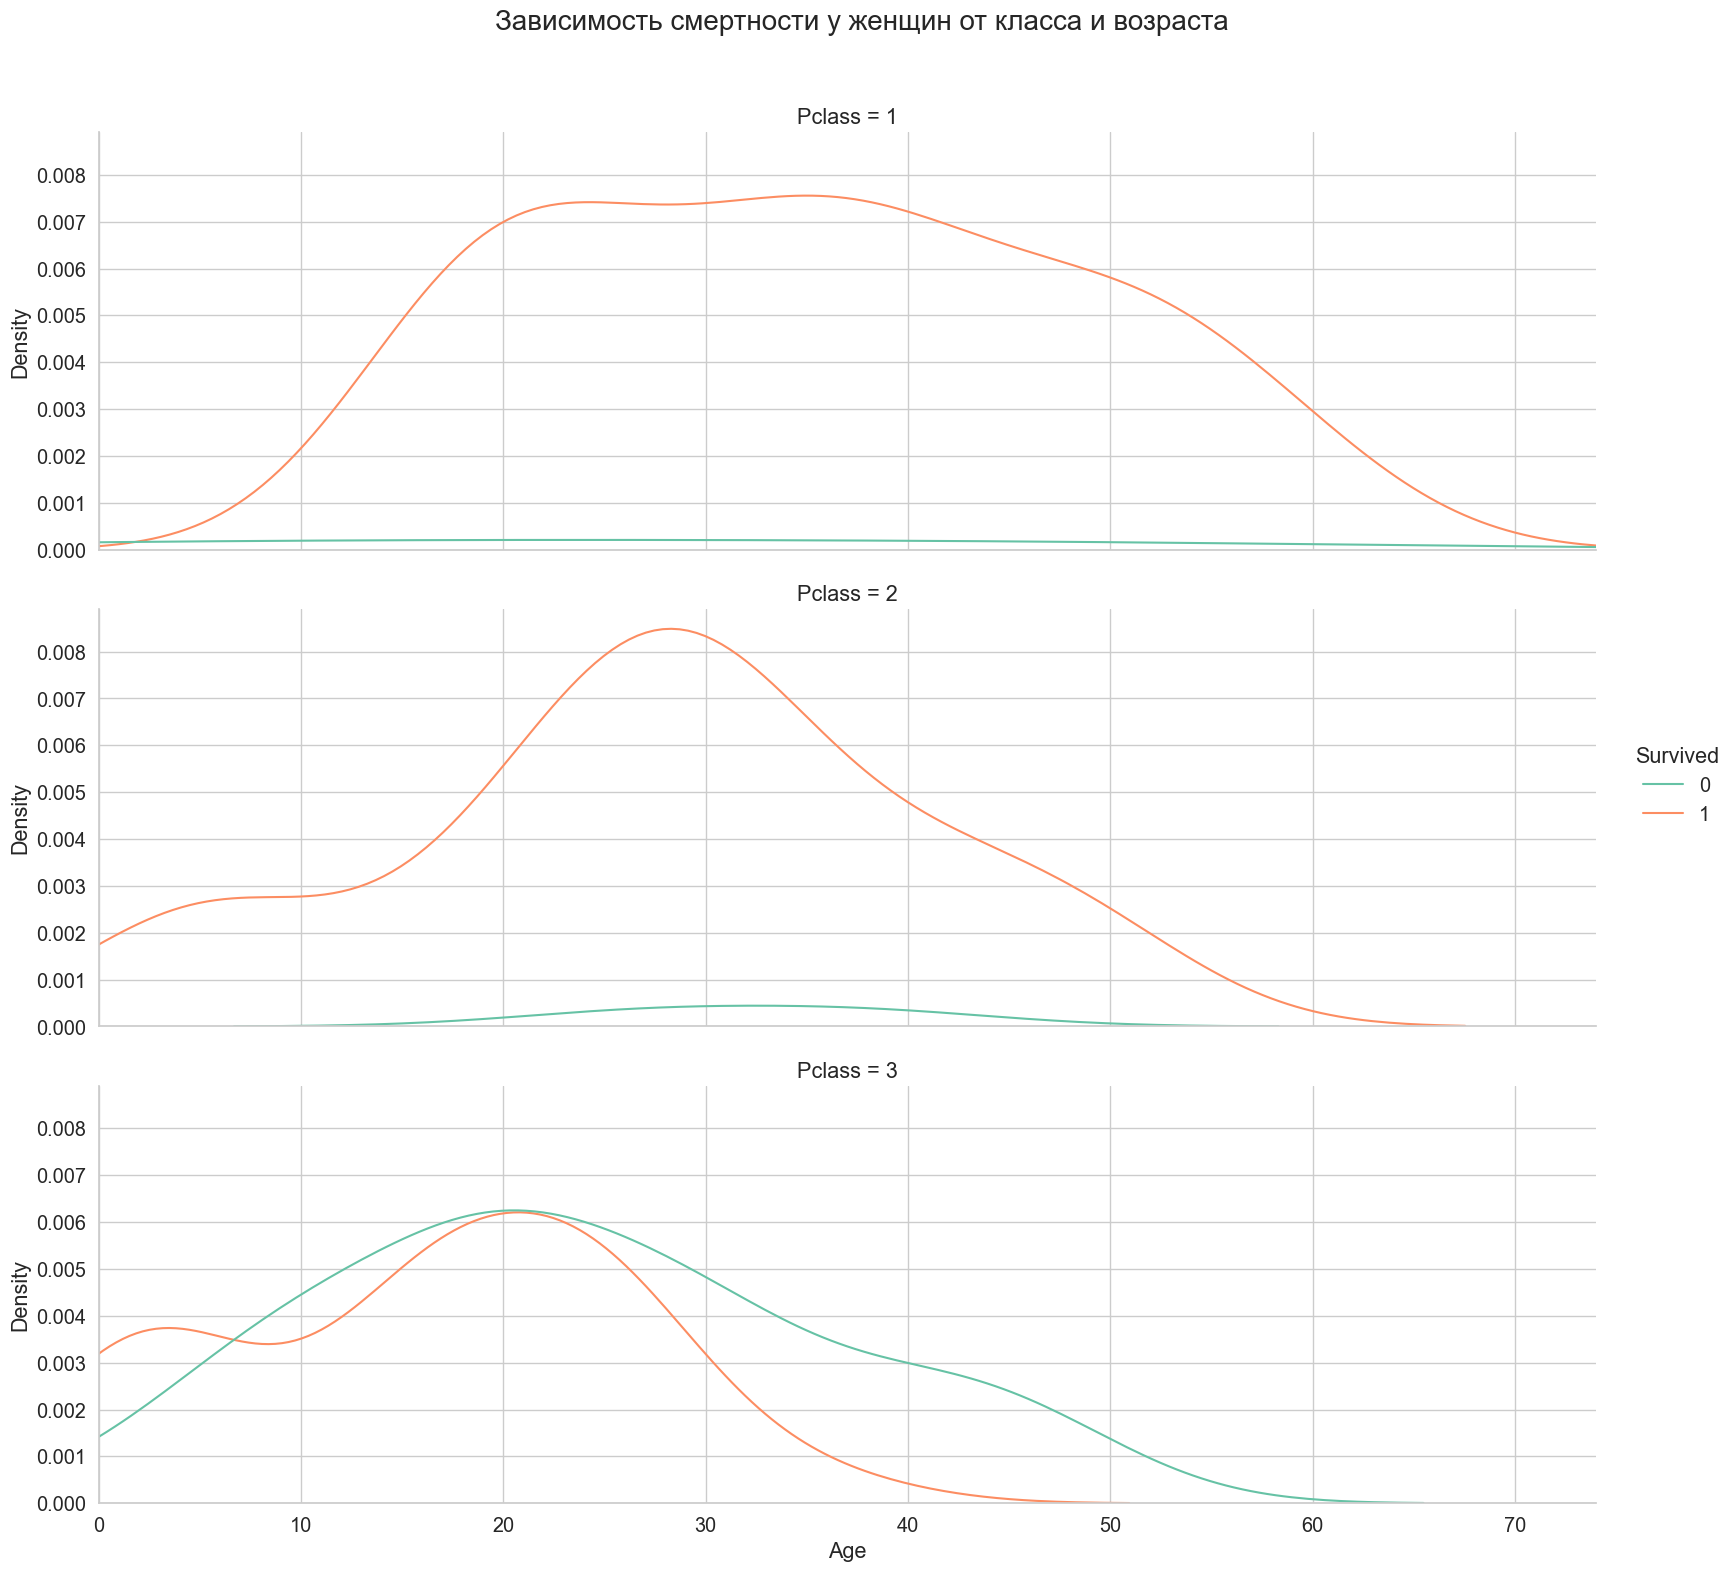

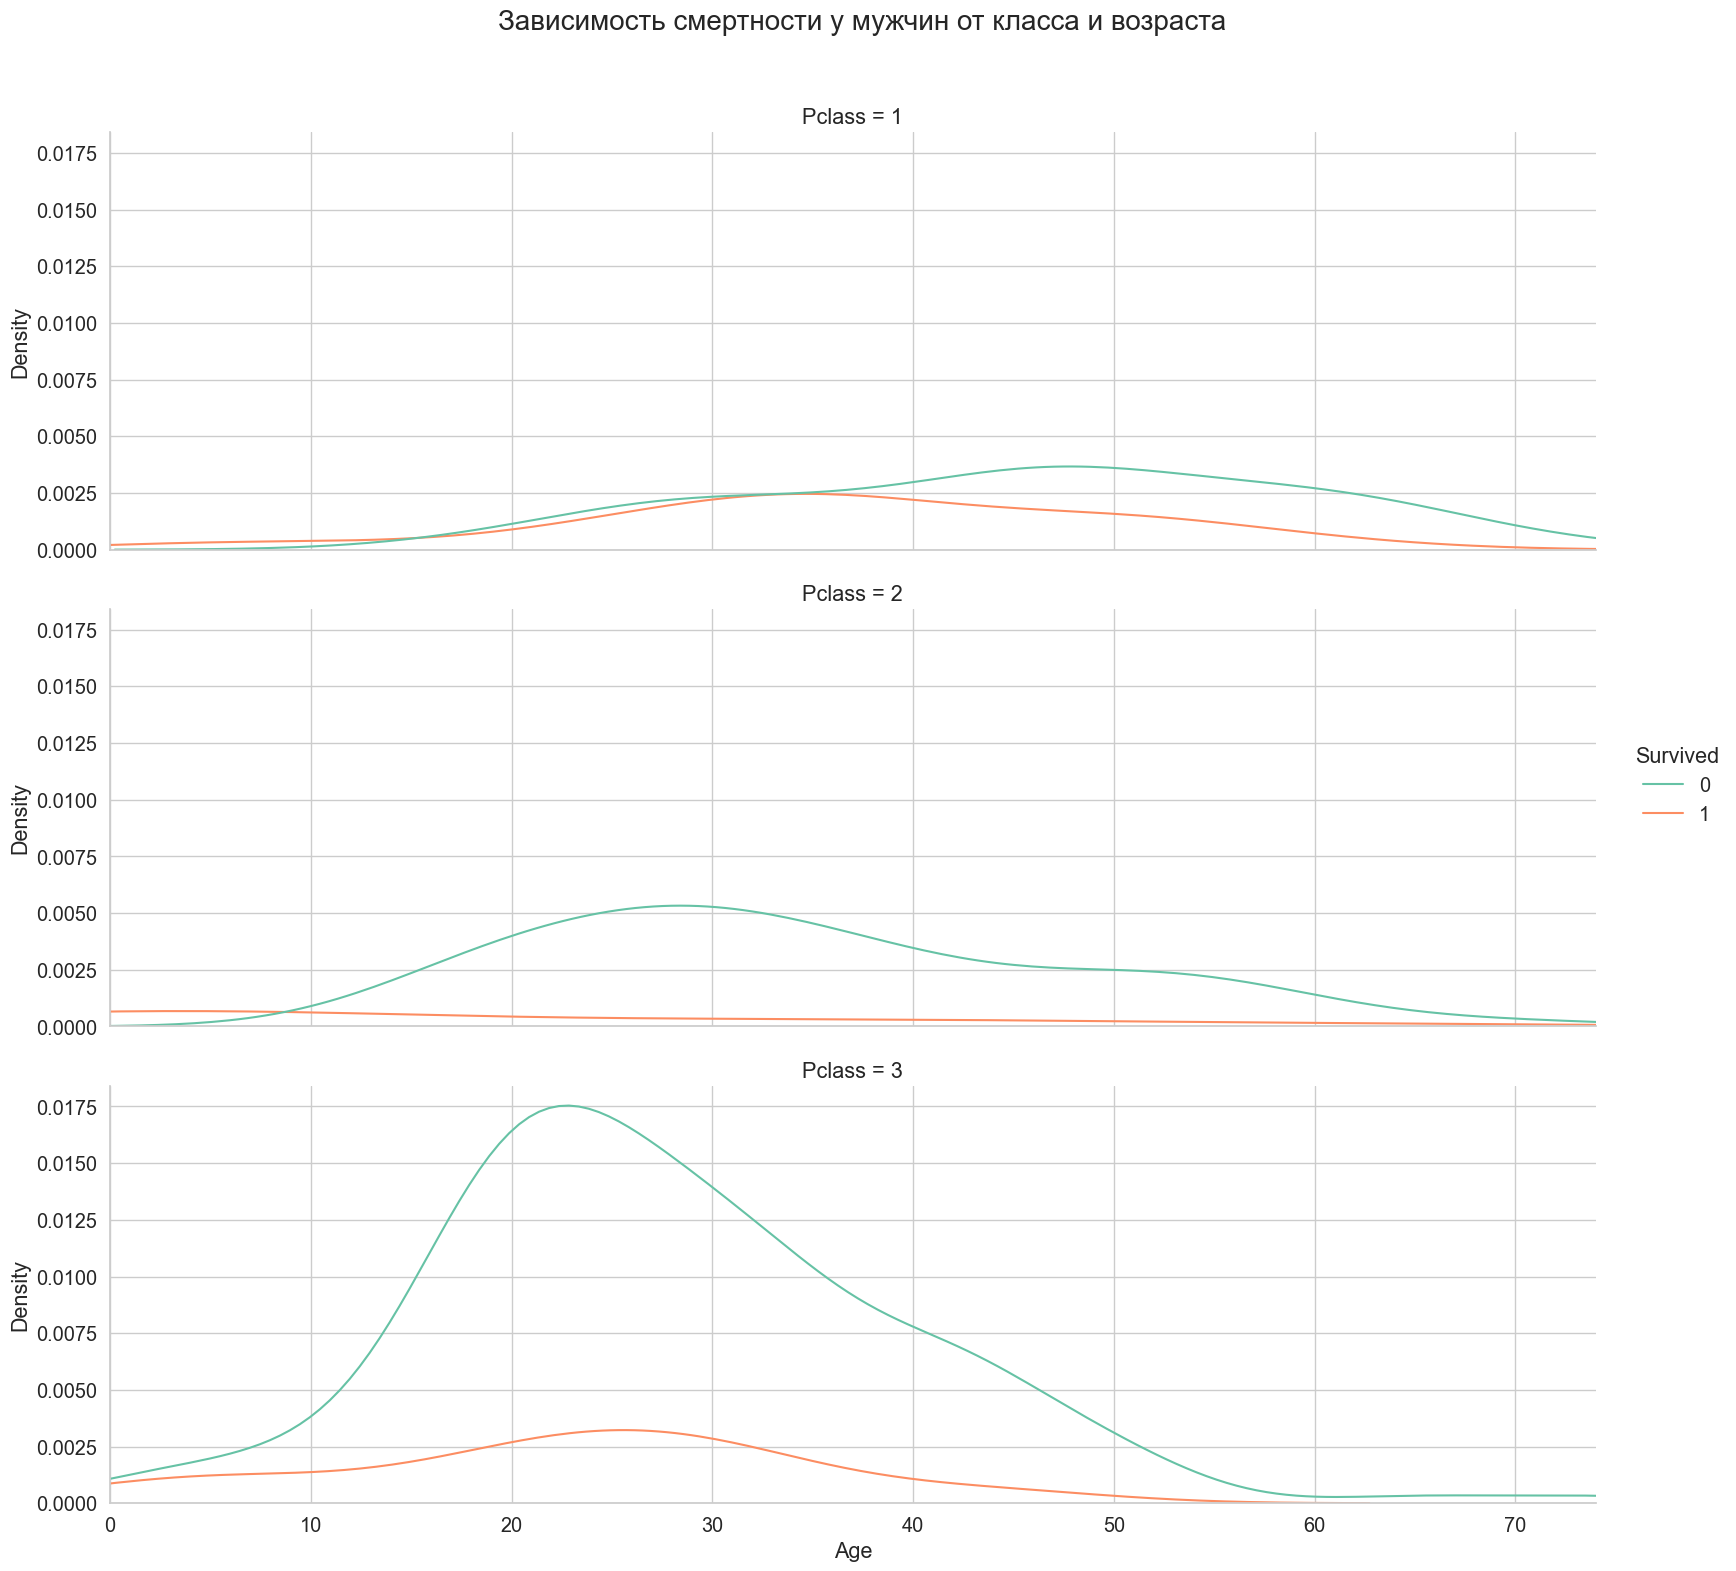

In [78]:
graph = sns.displot(x="Age", row="Pclass", hue='Survived', kind="kde",
                    data=train[train['Sex'] == 'female'], aspect=3.3)
graph.set(xlim=(0, train['Age'].max()))
graph.fig.suptitle('Зависимость смертности у женщин от класса и возраста', y=1.05, fontsize=20)
graph_2 = sns.displot(x="Age", row="Pclass", hue='Survived', kind="kde",
                    data=train[train['Sex'] != 'female'], aspect=3.3)
graph_2.set(xlim=(0, train['Age'].max()))
graph_2.fig.suptitle('Зависимость смертности у мужчин от класса и возраста',
                     y=1.05, fontsize=20)

У женщин 1 и 2 класса вне зависимости от возраста был наибольший шанс выжить среди всех пассажиров,
из женщин 3 класса в основном выживали девочки до 8 лет. У мужчин наименьшая смертность у детей 1 класса(до 16 лет) и детей 2 класса(до 9 лет).

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...


Первое дерево будем строить на основе построенной зависимости смертности от пола, возраста и класса пассажира.
Если жещина находилась в 1 или 2 классе, то с большим шансом она выживала, женщины 3 класса чаще погибали, если их возраст превосходил 8 лет.
Мужчины 3 класса почти не имели шансов на выживание, а дети 1 и 2 класса умирали, если их возраст превосходил 16 и 9 лет соответственно.

In [ ]:
def first_predict(row):
    if (row['Sex'] == 'female'):
        if (row['Pclass'] != 3):
            return 1
        else:
            return row['Age'] <= 8
    else:
        if (row['Pclass'] == 1):
            return row['Age'] <= 16
        else:
            return (row['Pclass'] == 2 and row['Age'] <= 9)

def first_tree(features):
    predicted = features.apply(predict, axis=1)
    return predicted

Второе дерево строим, основываясь на зависимости выживаемости пассажира от пола и количества родственников на борту.
Женщины, которые имели на борту не более 2 братьев, сестер(в том числе сводных) и супругов на борту имели больше шансов на выживание.
Среди мужчин наименьшая доля сметности у тех, кто имел на борту 1 родственника.


In [215]:
def second_predict(row):
    if (row['Sex'] == 'female'):
        return (row['SibSp'] <= 2)
    else:
        return (row['SibSp'] == 1)

def second_tree(features):
    predicted = features.apply(lambda row: first_predict(row), axis=1)
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...


Критерий: посчитаем количество совпадений реальных данных с predict, затем считаем отношение совпадений к общему числу результатов.

In [217]:
def criteria(target, predicted):
    count_predict = target == predicted
    res = count_predict.value_counts()[True] / len(count_predict)
    return res

Посчитайте качество полученных ранее деревьев.


In [544]:
first_res = first_tree(test_features)
print(criteria(test_target, first_res))
second_res = second_tree(test_features)
print(criteria(test_target, second_res))

0.7640449438202247
0.8239700374531835


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Найдем для каждого объекта ближайших k соседей и наиболее часто встречающееся значение целевого признака.

In [ ]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    C = np.sum((A.reshape(1, A.shape[0], A.shape[1])-B.reshape(B.shape[0], 1, B.shape[1]))**2, axis = -1); 
    return (np.argsort(C, axis = 1))[:, :k]


def res(count, train_target, nearest_points, k):
    sum = 0
    for i in range (0, k):
        sum += train_target.iloc[nearest_points[count][i]]
    return sum > k // 2

In [760]:
def knn(features, train_features, train_target, k=1):
    predicted = []
    nearest_points = find_nearest_points(train_features.to_numpy(), features.to_numpy(), k)
    count = 0
    for idx, row in features.iterrows():
        predicted.append(res(count, train_target, nearest_points, k))
        count += 1
    predicted = pd.Series(predicted)
    predicted.index = features.index
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

Функцией change преобразуем объекты test_features и train_features, заменяя nan.

In [818]:
def change(data):
    df = data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
    df['Age'] = df.Age.fillna(data.Age.mean())
    df['Fare'] = df.Fare.fillna(data.Fare.mean())
    df['Sex'] = df.Sex.map({'female' : 0,'male' : 1})
    return df

In [819]:
for i in range (1, 11):
    predict_res = knn(change(test_features), change(train_features), train_target, i)
    print('k =', i, '  ', criteria(test_target, predict_res), '\n')

k = 1    0.6666666666666666 

k = 2    0.7191011235955056 

k = 3    0.6816479400749064 

k = 4    0.6928838951310862 

k = 5    0.6928838951310862 

k = 6    0.7153558052434457 

k = 7    0.7191011235955056 

k = 8    0.7191011235955056 

k = 9    0.6928838951310862 

k = 10    0.7078651685393258 



Построим график зависимости критерия качества от 𝑘.

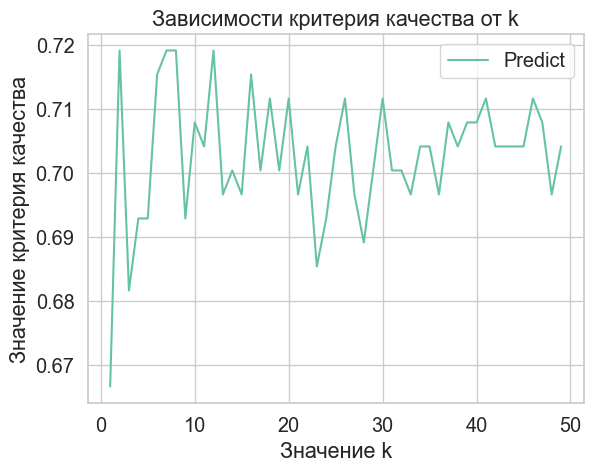

<Figure size 300x300 with 0 Axes>

In [817]:
predict = []
for i in range(1, 50):
    predict_res = knn(change(test_features), change(train_features), train_target, i)
    predict.append(criteria(test_target, predict_res))
df = pd.DataFrame(predict, index=range(1, 50), columns=['Predict'])
df.plot()
plt.title("Зависимости критерия качества от k")
plt.xlabel("Значение k")
plt.ylabel("Значение критерия качества")
fig = plt.figure(figsize=(3, 3))
plt.show()

Наилучший результат достигается при k примерно равном 2, 7 или 12. При сильном увеличении k значение критерия качества будет уменьшаться.

#### 6. Выводы

Женщинам и детям чаще удавалось выжить, в отличии от мужчин. Наибольшее влияние на смертность оказывал класс пассажира.